<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized ACT and SAT Test Analysis for states in US

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Both College Board and ACT Inc. have been making changes to their mission of making colleges accessible to a wide range of students and help make them ready for college.([*source*](https://www.number2.com/college-board-act/#Understanding_The_Relationship_Between_The_College_Board_and_The_ACT_Test)) The strategies include setting up school day exam, rolling out Assessment Suite, and turning tests online. This project aims to provide insights to both organisations and states/ districts educators by exploring the following :
    - the trend of particpation for both SAT and ACT from 2018 to 2019 
    - the correlation between participation rate and total score for both tests
    - the median of ACT & SAT test score for colleges of top 25 acceptance rate. 

**Problem Statement**: Which states shall each organisation focus to boost score performance while maintaining high participation rate so as to be effective in helping students? 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html) 

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Despite the fact that SAT will always be imperfect tool, it provides a more level playing field.[*source*](https://www.newyorker.com/news/annals-of-education/how-the-pandemic-remade-the-sat) 

Both organisations have been making changes to their mission and trying to meet the various needs from different parties. These include students, their families, college counselors, K-12 educators, researchers, policymakers, universities, colleges, athletic conferences, scholarship oragnisation and etc. The College Board has a new adversity score which responds to a growing trend among colleges to attract and enroll first-generation students and those with few resources. Similarly, ACT has been working on an approach to bolster student diversity through the ACT Holistic Framework.

### Datasets chosen 

* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def get_mean(numbers):
    return sum(numbers)/ len(numbers)

In [2]:
get_mean ([5, 3, 6, 9])

5.75

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def variance(numbers):
    mu = get_mean(numbers)
    return get_mean([(num - mu) ** 2 for num in numbers])

def stddev(numbers):
    return (variance(numbers)) ** 0.5

In [4]:
stddev([5, 3, 6, 9])

2.165063509461097

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code 
def percent_to_dp (percent):
    keep = '0123456789.'
    new = ''
    for p in percent:
        if p in keep:
            new = new + p
    try:
        return float(new)/100
    except (ValueError, NameError, AttributeError):
        return None
    
percent_to_dp ('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [6]:
# Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import and Cleaning

### 2018 & 2019 ACT & SAT Data Import and Cleaning

In [7]:
# load SAT and ACT 2018-2019 datasets into Pandas DataFrame 
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

In [8]:
# The first five rows of sat_2018
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [9]:
# The first five rows of act_2018
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [10]:
# The first five rows of sat_2019
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [11]:
# The first five rows of act_2019
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [12]:
# Define a function to observe any obvious error in data or incorrect datatype
def summary (df):
    return print('------Info/Datatype-----'), df.info(), print('------Missing Values/ Descriptive Statistics-----'), df.isna().sum(), df.describe()

 - To observe whether number of rows are tally.
 - To observe the Min/Max Values in SAT: The range of scores for each SAT section is 200-800.
 - To observe the Min/Max Values in ACT: The range of scores for each ACT section is 1-36.

In [13]:
summary (sat_2018)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
        Evidence-Based Reading and Writing        Math        Total
 count                           51.000000   51.000000    51.000000
 mean                           563.686275  556.235294  1120.019608
 std                             47.502627   47.772623    94.155083
 min                            480.000000  480.000000   977.000000
 25%                            534.500000  522.500000  1057.500000
 50%                            552.000000  544.000000  1098.000000
 75%                            610.500000  593.500000  1204.000000
 max                            643.000000  655.000000  1298.000000)

In [14]:
summary (act_2018)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State            0
 Participation    0
 Composite        0
 dtype: int64,
        Composite
 count  52.000000
 mean   21.544231
 std     2.119417
 min    17.700000
 25%    19.975000
 50%    21.300000
 75%    23.725000
 max    25.600000)

In [15]:
summary (sat_2019)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State                 0
 Participation Rate    0
 EBRW                  0
 Math                  0
 Total                 0
 dtype: int64,
              EBRW        Math        Total
 count   53.000000   53.000000    53.000000
 mean   558.000000  548.471698  1106.528302
 std     47.554422   53.785044   100.994784
 min    483.000000  445.000000   935.000000
 25%    518.000000  506.000000  1024.000000
 50%    550.000000  545.000000  1097.000000
 75%    610.000000  596.000000  1200.000000
 max    636.000000  648.000000  1284.000000)

In [16]:
summary (act_2019)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State            0
 Participation    0
 Composite        0
 dtype: int64,
        Composite
 count  52.000000
 mean   21.450000
 std     2.175487
 min    17.900000
 25%    19.800000
 50%    20.950000
 75%    23.650000
 max    25.500000)

In [17]:
# Fix any obvious error or wrong data type 
# Call the function to turn string of percentage into float values
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda x: percent_to_dp(x))
act_2018['Participation'] = act_2018['Participation'].apply(lambda x: percent_to_dp(x))
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(lambda x: percent_to_dp(x))
act_2019['Participation'] = act_2019['Participation'].apply(lambda x: percent_to_dp(x))

In [18]:
# Display summary again
summary (sat_2018)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64,
        Participation  Evidence-Based Reading and Writing        Math  \
 count      51.000000                           51.000000   51.000000   
 mean        0.457451                          563.686275  556.235294   
 std         0.373143                           47.502627   47.772623   
 min         0.020000                          480.000000  480.000000   
 25%         0.045000                          534.500000  522.500000   
 50%         0.520000                          552.000000  544.000000   
 75%         0.775000                          610.500000  593.500000   
 max         1.000000                          643.000000  655.000000   
 
              Total  
 count    51.000000  
 mean   1120.019608  
 std      94.155083  
 min     977

In [19]:
# Display summary again
summary (act_2019)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State            0
 Participation    0
 Composite        0
 dtype: int64,
        Participation  Composite
 count      52.000000  52.000000
 mean        0.585385  21.450000
 std         0.341883   2.175487
 min         0.060000  17.900000
 25%         0.247500  19.800000
 50%         0.530000  20.950000
 75%         1.000000  23.650000
 max         1.000000  25.500000)

In [20]:
# Display summary again
summary (sat_2019)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               53 non-null     object 
 1   Participation Rate  51 non-null     float64
 2   EBRW                53 non-null     int64  
 3   Math                53 non-null     int64  
 4   Total               53 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State                 0
 Participation Rate    2
 EBRW                  0
 Math                  0
 Total                 0
 dtype: int64,
        Participation Rate        EBRW        Math        Total
 count           51.000000   53.000000   53.000000    53.000000
 mean             0.490588  558.000000  548.471698  1106.528302
 std              0.387476   47.554422   53.785044   100.994784
 min              0.020000  483.000000  445.000000   935.000000
 25%              0.055000  518.000000  506.000000  1024.000000
 50%              0.540000  550.000000  545.000000  1097.000000
 75%              0.820000  610.000000  596.000000  1200.000000
 max              1.000000  636.000000  648.000000  1284.000000)

In [21]:
# Display summary again
summary (act_2019)

------Info/Datatype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB
------Missing Values/ Descriptive Statistics-----


(None,
 None,
 None,
 State            0
 Participation    0
 Composite        0
 dtype: int64,
        Participation  Composite
 count      52.000000  52.000000
 mean        0.585385  21.450000
 std         0.341883   2.175487
 min         0.060000  17.900000
 25%         0.247500  19.800000
 50%         0.530000  20.950000
 75%         1.000000  23.650000
 max         1.000000  25.500000)

In [22]:
# Random checking if any value is out of range
sat_2018[~sat_2018['Evidence-Based Reading and Writing'].between(200,800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [23]:
# Rename Columns - all lowercase, no spaces, unique and informative.
# Create a dictionary to change names, and specify test type and year.
sat_2018_new_columns_dict = {'State':'state',
                             'Participation':'2018_sat_participation',
                             'Evidence-Based Reading and Writing':'2018_sat_ebrw',
                             'Math' : '2018_sat_math',
                             'Total' : '2018_sat_total'}
sat_2018.rename(columns = sat_2018_new_columns_dict, inplace=True)

In [24]:
# Display first 5 rows
sat_2018.head()

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [25]:
# Rename Columns
sat_2019_new_column_dict = {'State':'state',
                            'Participation Rate':'2019_sat_participation',
                            'EBRW':'2019_sat_ebrw',
                            'Math':'2019_sat_math',
                            'Total':'2019_sat_total'}
sat_2019.rename(columns = sat_2019_new_column_dict, inplace=True)

In [26]:
# Display first 5 rows
sat_2019.head()

,state,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [27]:
# Try another method by turning column name to lower case first
act_2018.columns = act_2018.columns.str.lower()
act_2019.columns = act_2019.columns.str.lower()

In [28]:
# Rename Columns
act_2018.rename(columns={'state':'state', 'participation':'2018_act_participation','composite':'2018_act_composite'},inplace=True)
act_2019.rename(columns={'state':'state', 'participation':'2019_act_participation','composite':'2019_act_composite'},inplace=True)

In [29]:
# Columns name list
act_2018.columns

Index(['state', '2018_act_participation', '2018_act_composite'], dtype='object')

In [30]:
# Identify if there is any extra rows
print(f'The number of rows in ACT_2018 dataframe is {len(act_2018.index)} rows.')
print(f'The number of rows in ACT_2019 dataframe is {len(act_2019.index)} rows.')
print(f'The number of rows in SAT_2018 dataframe is {len(sat_2018.index)} rows.')
print(f'The number of rows in SAT_2019 dataframe is {len(sat_2019.index)} rows.')

The number of rows in ACT_2018 dataframe is 52 rows.
The number of rows in ACT_2019 dataframe is 52 rows.
The number of rows in SAT_2018 dataframe is 51 rows.
The number of rows in SAT_2019 dataframe is 53 rows.


In [31]:
# Compare the extra row using 'state' as it should be matching between all dataframes.
# There are total 50 states in US, take SAT_2018 as the correct dataset
act_2018[~act_2018['state'].isin(sat_2018['state'])]

,state,2018_act_participation,2018_act_composite
8,District of columbia,0.32,23.6


In [32]:
# Return the states not in another
sat_2019[~sat_2019['state'].isin(sat_2018['state'])]

,state,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total
39,Puerto Rico,NaN,483,462,944
47,Virgin Islands,NaN,490,445,935


In [33]:
# Return unwanted row
act_2019[~act_2019['state'].isin(sat_2018['state'])]

,state,2019_act_participation,2019_act_composite
51,National,0.52,20.7


In [34]:
# Find duplicate row
duplicate_1 = act_2018[act_2018.duplicated('state')]
print(f'The duplicate row based on state is')
duplicate_1

The duplicate row based on state is


,state,2018_act_participation,2018_act_composite
20,Maine,0.07,24.0


In [35]:
# Drop unnecessary rows, act_2018 has 1 duplicate row
act_2018 = act_2018.drop(index = 20).reset_index(drop = True)
act_2018.shape

(51, 3)

In [36]:
# Display to confirm
act_2018.iloc[19:22]

,state,2018_act_participation,2018_act_composite
19,Maine,0.07,24.0
20,Maryland,0.31,22.5
21,Massachusetts,0.25,25.5


In [37]:
# Correct the name for ACT 2018
act_2018_copy = act_2018.copy()
act_2018_copy.state[8] = 'District of Columbia' 

C:\Users\yuner\AppData\Local\Temp\ipykernel_11692\1021769458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2018_copy.state[8] = 'District of Columbia'


In [38]:
# Display to confirm
act_2018_copy.iloc[7:9]

,state,2018_act_participation,2018_act_composite
7,Delaware,0.17,23.8
8,District of Columbia,0.32,23.6


In [39]:
# Drop 'National' row in dataset act_2019 
act_2019 = act_2019.drop(index = 51).reset_index(drop = True)
act_2019.shape

(51, 3)

In [40]:
# Display if 'National' row is removed
act_2019.tail(3)

,state,2019_act_participation,2019_act_composite
48,West Virginia,0.49,20.8
49,Wisconsin,1.00,20.3
50,Wyoming,1.00,19.8


In [41]:
# Return rows and columns of dataset
sat_2019 = sat_2019.drop(index = [39, 47]).reset_index(drop = True)
sat_2019.shape

(51, 5)

In [42]:
# Display to confirm
act_2019.iloc[39:49:2]

,state,2019_act_participation,2019_act_composite
39,Rhode Island,0.12,24.7
41,South Dakota,0.75,21.6
43,Texas,0.39,20.5
45,Vermont,0.20,24.1
47,Washington,0.24,22.1


In [43]:
# Return rows and columns of dataset
sat_2018.shape

(51, 5)

In [44]:
# Merge dataframes that can be merged.
# Merge the act_2018 and sat_2018 into combined_2018_csv using the state in each dataframe as the key.
combined_2018_csv = pd.merge(sat_2018, act_2018_copy, on='state')
combined_2018_csv.shape

(51, 7)

In [45]:
# Merge the act_2019 and sat_2019 into combined_2019_csv using the state in each dataframe as the key.
combined_2019_csv = pd.merge(sat_2019, act_2019, on='state')
combined_2019_csv.shape

(51, 7)

In [46]:
# Merge the combined_2018_csv and combined_2019_csv into final_1819_csv using the state in each dataframe as the key. 
final_1819_csv = pd.merge(combined_2018_csv, combined_2019_csv, on='state')

In [47]:
# Print the first 3 rows of merged dataframes
print(final_1819_csv.shape)
final_1819_csv.head(3)

(51, 13)


,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
0,Alabama,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.29,577,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0


In [48]:
# Save your cleaned and merged dataframes as csv files.
final_1819_csv.to_csv('../data/final_1819_csv.csv')

### SAT ACT college Data Import and Cleaning

In [49]:
# Import data
sat_act_college = pd.read_csv('../data/sat_act_by_college.csv')

In [50]:
# Display first 5 rows
sat_act_college.head(5)

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [51]:
# Return rows and columns of dataset
sat_act_college.shape

(416, 8)

In [52]:
# summary (sat_act_college)
sat_act_college.describe()

,Number of Applicants
count,416.000000
mean,17481.759615
std,17447.621897
min,211.000000
25%,5313.000000
50%,11622.000000
75%,23599.750000
max,111322.000000


In [53]:
# Check for missing values
sat_act_college.isna().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

In [54]:
# Print maximum SAT and ACT percentiles 
print(max(sat_act_college['SAT Total 25th-75th Percentile']), max(sat_act_college['ACT Total 25th-75th Percentile']))

​​ 1530-1560 35-36


In [55]:
# The null values in "Applies to Class Year" are for schools that are not test optional
sat_act_college['Test Optional?'].value_counts() 

Yes         347
No           26
Yes (TB)     25
Yes*         16
Yes (TF)      2
Name: Test Optional?, dtype: int64

In [56]:
#Fills null values with "not applicable" because the schools do not have a test optional policy
sat_act_college['Applies to Class Year(s)'].fillna("N/A",inplace=True) 
sat_act_college['Applies to Class Year(s)'].value_counts()

2021                        196
All / Permanent Policy      158
N/A                          26
2021 2022 2023               15
2021 2022                    11
2021 2022 2023 2024           9
2021 2022 2023 2024 2025      1
Name: Applies to Class Year(s), dtype: int64

In [57]:
# Display datatypes
sat_act_college.dtypes

School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [58]:
# Changing "Accept Rate" to float in sat_college using percent_to_float function
sat_act_college['Accept Rate'] = sat_act_college['Accept Rate'].map(percent_to_dp)

In [59]:
# Display datatypes
sat_act_college.dtypes

School                             object
Test Optional?                     object
Applies to Class Year(s)           object
Policy Details                     object
Number of Applicants                int64
Accept Rate                       float64
SAT Total 25th-75th Percentile     object
ACT Total 25th-75th Percentile     object
dtype: object

In [60]:
# Rename columns
sat_act_college.columns = ['school', 'are_tests_optional','last_class_year', 'policy_details','num_of_applicants','acceptance_rate', 'sat_total_middle_range', 'act_total_middle_range']

In [61]:
# Split 25th and 75th percentile
sat_act_college[['sat_25th_percentile','sat_75th_percentile']] = sat_act_college['sat_total_middle_range'].str.split('-',n = 1, expand = True)
sat_act_college[['act_25th_percentile','act_75th_percentile']] = sat_act_college['act_total_middle_range'].str.split('-',n = 1, expand = True)

In [62]:
# Float 25th and 75th percentile
percentiles = ['sat_25th_percentile', 'sat_75th_percentile', 'act_25th_percentile', 'act_75th_percentile']
sat_act_college[percentiles] = sat_act_college[percentiles].apply(pd.to_numeric, errors='coerce', axis=1)

In [63]:
# Display first 10 rows
sat_act_college.head(10)

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440.0,1570.0,32.0,35.0
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460.0,1570.0,33.0,35.0
5,California Institute of Technology,Yes (TB),2021 2022,CalTech has adopted a two-year Test Blind poli...,8367,0.064,​​ 1530-1560,35-36,NaN,1560.0,35.0,36.0
6,Massachusetts Institute of Technology,Yes,2021,MIT has adopted a one-year test optional polic...,21706,0.067,​​ 1500-1570,34-36,NaN,1570.0,34.0,36.0
7,Brown University,Yes,2021,Brown has adopted a one-year test optional pol...,38674,0.071,​​ 1440-1570,33-35,NaN,1570.0,33.0,35.0
8,University of Chicago,Yes,All / Permanent Policy,UChicago offers a test optional policy which a...,32283,0.073,​​ 1490-1570,33-35,NaN,1570.0,33.0,35.0
9,Pomona College,Yes,2021,Pomona College has adopted a one-year test opt...,10401,0.074,1390-1540,32-35,1390.0,1540.0,32.0,35.0


In [64]:
# Checking for missing values
sat_act_college.isna().sum()

school                     0
are_tests_optional         0
last_class_year            0
policy_details             0
num_of_applicants          0
acceptance_rate            0
sat_total_middle_range     0
act_total_middle_range     0
sat_25th_percentile       10
sat_75th_percentile        6
act_25th_percentile        6
act_75th_percentile        6
dtype: int64

In [65]:
# display non-null dataset
sat_act_college_new = sat_act_college.loc[sat_act_college['sat_25th_percentile'].notnull(),['school','num_of_applicants','acceptance_rate', 'sat_total_middle_range', 'act_total_middle_range','sat_25th_percentile','sat_75th_percentile','act_25th_percentile','act_75th_percentile']]
sat_act_college_new

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,35370,0.055,1440-1570,32-35,1440.0,1570.0,32.0,35.0
3,Columbia University,40203,0.055,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,36844,0.061,1460-1570,33-35,1460.0,1570.0,33.0,35.0
...,...,...,...,...,...,...,...,...,...
411,University of Texas Rio Grande Valley,10680,0.798,950-1130,17-22,950.0,1130.0,17.0,22.0
412,University of South Dakota,4434,0.864,990-1180,19-25,990.0,1180.0,19.0,25.0
413,University of Mississippi,15371,0.881,1050-1270,21-29,1050.0,1270.0,21.0,29.0
414,University of Wyoming,5348,0.960,1060-1280,22-28,1060.0,1280.0,22.0,28.0


In [66]:
# Checking for missing values
sat_act_college_new.isna().sum()

school                    0
num_of_applicants         0
acceptance_rate           0
sat_total_middle_range    0
act_total_middle_range    0
sat_25th_percentile       0
sat_75th_percentile       0
act_25th_percentile       5
act_75th_percentile       5
dtype: int64

In [67]:
# Further drop null values
sat_act_college_new = sat_act_college_new.loc[sat_act_college_new['act_75th_percentile'].notnull()]

In [68]:
# Checking for missing values
sat_act_college_new.isna().sum()

school                    0
num_of_applicants         0
acceptance_rate           0
sat_total_middle_range    0
act_total_middle_range    0
sat_25th_percentile       0
sat_75th_percentile       0
act_25th_percentile       0
act_75th_percentile       0
dtype: int64

In [69]:
# Make column easier to visualize
sat_act_college['last_class_year'] = sat_act_college['last_class_year'].replace('All / Permanent Policy', 'Permanent') 
def new_years(string):
    newyear = string.split(' ')[-1]
    if len(newyear) == 4:
        return int(newyear)
    else:
        return newyear 

In [70]:
# Change total years to last year
sat_act_college['last_class_year'] = sat_act_college['last_class_year'].map(new_years) 

In [71]:
# Display first 5 rows
sat_act_college.head()

,school,are_tests_optional,last_class_year,policy_details,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,0.055,1440-1570,32-35,1440.0,1570.0,32.0,35.0
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,0.055,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,0.061,1460-1570,33-35,1460.0,1570.0,33.0,35.0


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|final_1819|The state in the US and District of Columbia.| 
|**2018_sat_participation**|*float64*|final_1819|The participation rate of SAT test among high school seniors in a state for year 2018 (units percent to 2 decimal places 0.06 means 6%).| 
|**2018_sat_erbw**|*int64*|final_1819|The average SAT test score for subject "Evidence-Based Reading and Writing" in a state for year 2018 (min 200, max 800).|
|**2018_sat_math**|*int64*|final_1819|The average SAT test score for subject "Math" in a state for year 2018 (min 200, max 800).|
|**2018_sat_total**|*int64*|final_1819|The total of average SAT test score for both subjects in a state for year 2018 (min 400, max 1600).|
|**2018_act_participation**|*float64*|final_1819|The participation rate of ACT test among high school seniors in a state for year 2018 (units percent to 2 decimal places 0.41 means 41%).|
|**2018_act_composite**|*float64*|final_1819|The mean of average ACT test score for all four subjects "English", "Math", "Reading", & "Science" in a state for year 2018 (min 1.0, max 36.0).|
|**2019_sat_participation**|*float64*|final_1819|The participation rate of SAT test among high school seniors in a state for year 2019 (units percent to 2 decimal places 0.06 means 6%).| 
|**2019_sat_erbw**|*int64*|final_1819|The average SAT test score for subject "Evidence-Based Reading and Writing" in a state for year 2019 (min 200, max 800).|
|**2019_sat_math**|*int64*|final_1819|The average SAT test score for subject "Math" in a state for year 2019 (min 200, max 800).|
|**2019_sat_total**|*int64*|final_1819|The total of average SAT test score for both subjects in a state for year 2019 (min 400, max 1600).|
|**2019_act_participation**|*float64*|final_1819|The participation rate of ACT test among high school seniors in a state for year 2019 (units percent to 2 decimal placess 0.41 means 41%).|
|**2019_act_composite**|*float64*|final_1819|The mean of average ACT test score for all four subjects "English", "Math", "Reading", & "Science" in a state for year 2019 (min 1.0, max 36.0).|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|sat_act_college|College or University name.| 
|**are_tests_optional**|*object*|sat_act_college|Yes or No statement regarding presence of test-optional policies at the school.|
|**last_class_year**|*object*|sat_act_college|The last application year the test-optional policy will be in place.|
|**policy_details**|*object*|sat_act_college|Details of the test optional policy.|
|**num_of_applicants**|*int64*|sat_act_college|Number of applicants to the school.|
|**acceptance_rate**|*float64*|sat_act_college|Percent (%) of students accepted among those who applied.|
|**sat_total_middle_range**|*object*|sat_act_college|Range of 25th and 75th percentile SAT scores accepted by the school.|
|**act_total_middle_range**|*object*|sat_act_college|Range of 25th and 75th percentile ACT scores accepted by the school.|
|**sat_25th_percentile**|*float64*|sat_act_college|25th percentile of school's accepted SAT scores.|
|**sat_75th_percentile**|*float64*|sat_act_college|75th percentile of school's accepted SAT scores.|
|**act_25th_percentile**|*float64*|sat_act_college|25th percentile of school's accepted ACT scores.|
|**act_75th_percentile**|*float64*|sat_act_college|75th percentile of school's accepted SAT scores.|

## Exploratory Data Analysis

### Summary Statistics.

In [72]:
# summary of combined dataset
final_1819_csv.describe().round(2)

,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,0.46,563.69,556.24,1120.02,0.62,21.50,0.49,560.80,552.20,1113.08,0.59,21.46
std,0.37,47.50,47.77,94.16,0.34,2.11,0.39,46.25,51.29,97.20,0.35,2.19
min,0.02,480.00,480.00,977.00,0.07,17.70,0.02,483.00,460.00,943.00,0.06,17.90
25%,0.04,534.50,522.50,1057.50,0.29,19.95,0.06,527.50,511.50,1038.00,0.24,19.80
50%,0.52,552.00,544.00,1098.00,0.66,21.30,0.54,550.00,546.00,1097.00,0.54,21.10
75%,0.78,610.50,593.50,1204.00,1.00,23.65,0.82,612.00,599.00,1210.00,1.00,23.70
max,1.00,643.00,655.00,1298.00,1.00,25.60,1.00,636.00,648.00,1284.00,1.00,25.50


In [73]:
# datatype of combined dataset
final_1819_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   2018_sat_participation  51 non-null     float64
 2   2018_sat_ebrw           51 non-null     int64  
 3   2018_sat_math           51 non-null     int64  
 4   2018_sat_total          51 non-null     int64  
 5   2018_act_participation  51 non-null     float64
 6   2018_act_composite      51 non-null     float64
 7   2019_sat_participation  51 non-null     float64
 8   2019_sat_ebrw           51 non-null     int64  
 9   2019_sat_math           51 non-null     int64  
 10  2019_sat_total          51 non-null     int64  
 11  2019_act_participation  51 non-null     float64
 12  2019_act_composite      51 non-null     float64
dtypes: float64(6), int64(6), object(1)
memory usage: 5.6+ KB


In [74]:
# summary of dataset
sat_act_college.describe().round(2)

,num_of_applicants,acceptance_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,416.00,416.00,406.00,410.00,410.00,410.00
mean,17481.76,0.56,1163.83,1358.89,24.71,29.89
std,17447.62,0.24,126.13,111.43,4.13,3.15
min,211.00,0.04,793.00,1050.00,15.00,19.00
25%,5313.00,0.38,1070.00,1270.00,22.00,28.00
50%,11622.00,0.61,1150.00,1350.00,24.00,30.00
75%,23599.75,0.74,1249.50,1440.00,28.00,32.00
max,111322.00,1.00,1490.00,1580.00,35.00,36.00


#### Standard deviation.

In [75]:
# Dictionary comprehension to apply std to each numeric column in the dataframe.
sd = {col : round(stddev(final_1819_csv[col]),6) for col in final_1819_csv.columns if ((final_1819_csv[col].dtype == float) | (final_1819_csv[col].dtype == 'int64'))}
sd

{'2018_sat_participation': 0.369466,
 '2018_sat_ebrw': 47.03461,
 '2018_sat_math': 47.301946,
 '2018_sat_total': 93.227424,
 '2018_act_participation': 0.337017,
 '2018_act_composite': 2.090779,
 '2019_sat_participation': 0.383658,
 '2019_sat_ebrw': 45.792379,
 '2019_sat_math': 50.785215,
 '2019_sat_total': 96.240272,
 '2019_act_participation': 0.341758,
 '2019_act_composite': 2.172901}

In [76]:
# Explore the alternative standard deviation value with Pandas 
# Dictionary to show differences between manual calculations and pandas deviation method
{col: round((stddev(final_1819_csv[col]) - final_1819_csv[col].std()),6) for col in final_1819_csv.columns[1:]}

{'2018_sat_participation': -0.003676,
 '2018_sat_ebrw': -0.468018,
 '2018_sat_math': -0.470678,
 '2018_sat_total': -0.927659,
 '2018_act_participation': -0.003353,
 '2018_act_composite': -0.020804,
 '2019_sat_participation': -0.003818,
 '2019_sat_ebrw': -0.455657,
 '2019_sat_math': -0.505338,
 '2019_sat_total': -0.957638,
 '2019_act_participation': -0.003401,
 '2019_act_composite': -0.021621}

In [77]:
# Dictionary to show differences between manual calculations and numpy std method
{col: round((stddev(final_1819_csv[col]) - np.std(final_1819_csv[col])),6) for col in final_1819_csv.columns[1:]}

{'2018_sat_participation': 0.0,
 '2018_sat_ebrw': 0.0,
 '2018_sat_math': 0.0,
 '2018_sat_total': 0.0,
 '2018_act_participation': 0.0,
 '2018_act_composite': 0.0,
 '2019_sat_participation': 0.0,
 '2019_sat_ebrw': 0.0,
 '2019_sat_math': 0.0,
 '2019_sat_total': 0.0,
 '2019_act_participation': 0.0,
 '2019_act_composite': 0.0}

In [78]:
# Dictionary comprehension to apply std to each numeric column in the dataframe.
sd = {col : round(stddev(sat_act_college[col]),6) for col in sat_act_college.columns if ((sat_act_college[col].dtype == float) | (sat_act_college[col].dtype == 'int64'))}
sd

{'num_of_applicants': 17426.63858,
 'acceptance_rate': 0.241826,
 'sat_25th_percentile': nan,
 'sat_75th_percentile': nan,
 'act_25th_percentile': nan,
 'act_75th_percentile': nan}

#### Trends in data.

- Which states have the highest and lowest participation rates for the 2018 and 2019 SAT and ACT?
- Which states have the highest and lowest mean total/composite scores for the 2018 and 2019 SAT and ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests each year?
- Which colleges have the highest median SAT and ACT scores for admittance?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

##### Participation rate for 2018 and 2019 SAT and ACT.

In [79]:
# lowest participation rates for the 2018 SAT
final_1819_csv[['state','2018_sat_participation']].sort_values(by=['2018_sat_participation'],ascending = False).tail(8)

,state,2018_sat_participation
16,Kansas,0.04
41,South Dakota,0.03
27,Nebraska,0.03
24,Mississippi,0.03
15,Iowa,0.03
49,Wisconsin,0.03
50,Wyoming,0.03
34,North Dakota,0.02


In [80]:
# highest participation rates for the 2018 SAT
final_1819_csv[['state','2018_sat_participation']].sort_values(by=['2018_sat_participation'],ascending = False).head(8)

,state,2018_sat_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97


In 2018, SAT test participation rate findings as below:
- 5 states with highest : Idaho, Colorado, Connecticut, Delaware, Michigan (100%)
- 1 state with lowest  : North Dakota (2%)

In [81]:
# lowest participation rates for the 2018 ACT
final_1819_csv[['state','2018_act_participation']].sort_values(by=['2018_act_participation'],ascending = False).tail(8)

,state,2018_act_participation
46,Virginia,0.24
47,Washington,0.24
22,Michigan,0.22
38,Pennsylvania,0.20
7,Delaware,0.17
29,New Hampshire,0.16
39,Rhode Island,0.15
19,Maine,0.07


In [82]:
# highest participation rates for the 2018 ACT
final_1819_csv[['state','2018_act_participation']].sort_values(by=['2018_act_participation'],ascending = False).head(20)

,state,2018_act_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Ohio,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00


In 2018, ACT test participation rate findings as below:
- 17 states with highest : Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Ohio, Oklahoma, North Carolina, Nevada, Nebraska, Missouri, Mississippi, Louisiana, Montana, Wyoming, Arkansas (100%)
- 1 state with lowest  : Maine (7%)

In [83]:
# lowest participation rates for the 2019 SAT
final_1819_csv[['state','2019_sat_participation']].sort_values(by=['2019_sat_participation'],ascending = False).tail(8)

,state,2019_sat_participation
16,Kansas,0.04
41,South Dakota,0.03
27,Nebraska,0.03
24,Mississippi,0.03
15,Iowa,0.03
49,Wisconsin,0.03
50,Wyoming,0.03
34,North Dakota,0.02


In [84]:
# highest participation rates for the 2019 SAT
final_1819_csv[['state','2019_sat_participation']].sort_values(by=['2019_sat_participation'],ascending = False).head(10)

,state,2019_sat_participation
39,Rhode Island,1.00
13,Illinois,1.00
22,Michigan,1.00
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
9,Florida,1.00
12,Idaho,1.00
19,Maine,0.99
48,West Virginia,0.99


In 2019, SAT test participation rate findings as below:
- 8 states with highest : Florida, Rhode Island, Michigan, Illinois, Colorado, Connecticut, Delaware, Idaho (100%)
- 1 state with lowest  : North Dakota (2%)

In [85]:
# lowest participation rates for the 2018 ACT
final_1819_csv[['state','2018_act_participation']].sort_values(by=['2018_act_participation'],ascending = False).tail(8)

,state,2018_act_participation
46,Virginia,0.24
47,Washington,0.24
22,Michigan,0.22
38,Pennsylvania,0.20
7,Delaware,0.17
29,New Hampshire,0.16
39,Rhode Island,0.15
19,Maine,0.07


In [86]:
# highest participation rates for the 2019 ACT
final_1819_csv[['state','2019_act_participation']].sort_values(by=['2019_act_participation'],ascending = False).head(16)

,state,2019_act_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
36,Ohio,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
27,Nebraska,1.00


In 2019, ACT test participation rate findings as below:
- 15 states with highest : Alabama, Kentucky, Wisconsin, Utah, Tennessee, Ohio, Oklahoma, North Carolina, Nevada, Nebraska, Mississippi, Louisiana, Montana, Wyoming, Arkansas (100%)
- 1 state with lowest  : Maine (7%)

Obvious finding from 2018 to 2019:
- SAT test 
    - number of states with 100% participation rate is increased from 5 to 8 with addition states - namely Florida, Rhode Island, Illinois. 
    - state with the lowest participation rate remained the same - namely North Dakota with only 2% 
- ACT test 
    - number of states with 100% participation rate is decreased from 17 to 15 with disappearing states - namely South Carolina, Missouri. 
    - state with the lowest participation rate remained the same - namely Maine with only 7% 
We can infer from this that the ACT has a larger baseline following than the SAT. 

##### Mean total score for 2018 and 2019 SAT and ACT.

In [87]:
# Function to display top 5 and bottom 5 of dataframe
def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)
# source: https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail/53311747#53311747

In [88]:
# Which states have the highest and lowest mean total scores for 2018 SAT?
display_n(final_1819_csv[['state','2018_sat_total']].sort_values(by=['2018_sat_total']),5)

,state,2018_sat_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010
...,...,...
16,Kansas,1265
15,Iowa,1265
34,North Dakota,1283
49,Wisconsin,1294


In 2018, SAT test mean total score findings as below:
- 1 state with highest score : Minnesota (1298/1600)
- 1 state with lowest score  : District of Columbia (977/1600)

In [89]:
# Which states have the highest and lowest mean total scores for 2019 SAT?
display_n(final_1819_csv[['state','2019_sat_total']].sort_values(by=['2019_sat_total']),5)

,state,2019_sat_total
48,West Virginia,943
35,Oklahoma,963
8,District of Columbia,975
7,Delaware,985
12,Idaho,993
...,...,...
27,Nebraska,1260
34,North Dakota,1263
41,South Dakota,1268
49,Wisconsin,1283


In 2019, SAT test mean total score findings as below:
- 1 state with highest score: Minnesota (1284/1600)
- 1 state with lowest score  : West Virginia (943/1600)

In [90]:
# Which states have the highest and lowest mean composite scores for 2018 ACT?
display_n(final_1819_csv[['state','2018_act_composite']].sort_values(by=['2018_act_composite']),5)

,state,2018_act_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
...,...,...
22,Michigan,24.2
32,New York,24.5
29,New Hampshire,25.1
21,Massachusetts,25.5


In 2018, ACT test mean total score findings as below:
- 1 state with highest score : Connecticut (25.6/36)
- 1 state with lowest score  : Nevada (17.7/36)

In [91]:
# Which states have the highest and lowest mean composite scores for 2019 ACT?
display_n(final_1819_csv[['state','2019_act_composite']].sort_values(by=['2019_act_composite']),5)

,state,2019_act_composite
28,Nevada,17.9
24,Mississippi,18.4
40,South Carolina,18.8
18,Louisiana,18.8
0,Alabama,18.9
...,...,...
32,New York,24.5
39,Rhode Island,24.7
29,New Hampshire,25.0
6,Connecticut,25.5


In 2019, ACT test mean total score findings as below:
- 2 states with highest score : Connecticut, Massachusetts (25.5/36)
- 1 state with lowest score  : Nevada (17.9/36)

From 2018 to 2019, the mean total score for SAT is dropping with lower value for both highest and lowest scores. It seems test takers in 2019 performed not as well as those in 2018. 

Likewise, the mean total score for ACT is dropping by 0.1 for highest score while increasing by 0.2 for lowest score. It seems test takers' performance in 2019 is more concentrated with smaller standard deviation.

We noticed a trend where mid-rural states (e.g. Kansas and Iowa) seem to do better on the SAT as compared to urban states (e.g. Washington DC) or coastal states (e.g. Delware). On the other hand, the opposite pattern seems true, where urban states (e.g. New York and DC) do better than rural states (e.g. South Carolina) on the ACT. **Nevertheless, if we look closer, this is actually a case of selection bias.**

In [92]:
# Check if any states with 100% participation on SAT test have a rate change from 2018 to 2019
final_1819_csv[(final_1819_csv['2018_sat_participation'] == 1.00) & (final_1819_csv['2019_sat_participation'] < 1.00) ]

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite


In [93]:
# Check if any states with 100% participation on SAT test have a rate change from 2018 to 2019
final_1819_csv[(final_1819_csv['2019_sat_participation'] == 1.00)]

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
5,Colorado,1.00,519,506,1025,0.30,23.9,1.0,518,506,1024,0.27,23.8
6,Connecticut,1.00,535,519,1053,0.26,25.6,1.0,529,516,1046,0.22,25.5
7,Delaware,1.00,505,492,998,0.17,23.8,1.0,499,486,985,0.13,24.1
9,Florida,0.56,550,549,1099,0.66,19.9,1.0,516,483,999,0.54,20.1
12,Idaho,1.00,508,493,1001,0.36,22.3,1.0,505,488,993,0.31,22.5
13,Illinois,0.99,513,506,1019,0.43,23.9,1.0,509,504,1013,0.35,24.3
22,Michigan,1.00,511,499,1011,0.22,24.2,1.0,507,496,1003,0.19,24.4
39,Rhode Island,0.97,513,505,1018,0.15,24.2,1.0,503,492,995,0.12,24.7


In [94]:
# Check if any states with 100% participation on ACT test have a rate change from 2018 to 2019
final_1819_csv[(final_1819_csv['2018_act_participation'] == 1.00) & (final_1819_csv['2019_act_participation'] < 1.00) ]

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
25,Missouri,0.04,633,629,1262,1.0,20.0,0.04,622,615,1236,0.82,20.8
40,South Carolina,0.55,547,523,1070,1.0,18.3,0.68,526,504,1030,0.78,18.8


There is no rate change for states with 100% participation on SAT test from 2018 to 2019.  

Missouri and South Carolina have a significant drop between 18% to 22% in ACT participation rate. 

Even being offered the option to choose which test to adopt, the majority of state districts chose the ACT over the SAT.

In [95]:
# Do any states show have >50% participation on both tests each year?
# Check for states where participation rates >50% for both tests in 2018
final_1819_csv[(final_1819_csv['2018_sat_participation'] > 0.50) & (final_1819_csv['2018_act_participation'] > 0.50)] \
        [['state','2018_sat_participation', '2018_act_participation']] \
        .sort_values('2018_sat_participation')

,state,2018_sat_participation,2018_act_participation
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00
9,Florida,0.56,0.66
11,Hawaii,0.56,0.89
10,Georgia,0.70,0.53


In [96]:
# Check for states where participation rates >50% for both tests in 2019
final_1819_csv[(final_1819_csv['2019_sat_participation'] > 0.50) & (final_1819_csv['2019_act_participation'] > 0.50)] \
        [['state','2019_sat_participation', '2019_act_participation']] \
        .sort_values('2019_sat_participation')

,state,2019_sat_participation,2019_act_participation
33,North Carolina,0.51,1.00
11,Hawaii,0.54,0.80
40,South Carolina,0.68,0.78
9,Florida,1.00,0.54


Flordia, Hawaii and Georgia have greater than 50% participation rates for both tests in 2018 and 2019. Hawaii is interesting as the state is rather unique in terms of its location and demographics. The majority of Hawaiians live in urban areas, which seems to be contrary to the trend of urban/coastal states favoring the SAT test.

Both North and South Carolina both have more than 50% participation for the ACT and SAT tests. Interestingly, North Carolina, South Carolina, Florida and Georgia are in close geographic proximity, and are all officially recognised as part of the Southern US region. 

#### sat_act_college

In [97]:
# Sort dataframe by sat 25th percentile and takes the top 5 highest school 
sat_act_college_new.sort_values(by = 'sat_25th_percentile', ascending=False).head() 
# display_n(sat_act_college[['school','sat_25th_percentile']].sort_values(by = 'sat_25th_percentile'),5)

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
31,Harvey Mudd College,4045,0.137,1490-1570,33-35,1490.0,1570.0,33.0,35.0
35,Washington University in St. Louis,31320,0.150,1470-1570,32-35,1470.0,1570.0,32.0,35.0
18,Johns Hopkins University,29129,0.106,1470-1560,33-35,1470.0,1560.0,33.0,35.0
1,Harvard College,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
37,Carnegie Mellon University,27634,0.154,1460-1560,33-35,1460.0,1560.0,33.0,35.0


Top 5 schools based on SAT 25th percentile: Harvey Mudd, Washington University in St. Louis, Johns Hopkins University, Harvard College and Carnegie Mellon University.

In [98]:
# Sort dataframe by sat 75th percentile and takes the top 5 highest school 
sat_act_college_new.sort_values(by = 'sat_75th_percentile', ascending=False).head() 

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
1,Harvard College,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0
0,Stanford University,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
35,Washington University in St. Louis,31320,0.150,1470-1570,32-35,1470.0,1570.0,32.0,35.0
13,Duke University,35767,0.089,1450-1570,33-35,1450.0,1570.0,33.0,35.0
31,Harvey Mudd College,4045,0.137,1490-1570,33-35,1490.0,1570.0,33.0,35.0


Top 5 schools based on SAT 75th percentile: Harvard College, Stanford University, Washington University in St. Louis, Duke University and Harvey Mudd College.

In [99]:
# Sort dataframe by act 25th percentile and takes the top 5 highest school 
sat_act_college_new.sort_values(by = 'act_25th_percentile', ascending=False).head() 

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
13,Duke University,35767,0.089,1450-1570,33-35,1450.0,1570.0,33.0,35.0
31,Harvey Mudd College,4045,0.137,1490-1570,33-35,1490.0,1570.0,33.0,35.0
37,Carnegie Mellon University,27634,0.154,1460-1560,33-35,1460.0,1560.0,33.0,35.0
3,Columbia University,40203,0.055,1450-1560,33-35,1450.0,1560.0,33.0,35.0
4,Yale University,36844,0.061,1460-1570,33-35,1460.0,1570.0,33.0,35.0


Top 5 schools based on ACT 25th percentile: Duke University, Harvey Mudd College, Carnegie Mellon University, Columbia University and Yale University.

In [100]:
# Sort dataframe by act 75th percentile and takes the top 5 highest school 
sat_act_college_new.sort_values(by = 'act_75th_percentile', ascending=False).head() 

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
0,Stanford University,47452,0.043,1440-1570,32-35,1440.0,1570.0,32.0,35.0
16,Vanderbilt University,37310,0.091,1460-1560,33-35,1460.0,1560.0,33.0,35.0
44,Northeastern University,62263,0.181,1390-1540,32-35,1390.0,1540.0,32.0,35.0
38,University of Notre Dame,22200,0.158,1400-1550,32-35,1400.0,1550.0,32.0,35.0
37,Carnegie Mellon University,27634,0.154,1460-1560,33-35,1460.0,1560.0,33.0,35.0


Top 5 schools based on ACT 75th percentile: Stanford University, Vanderbilt University, Northeastern University, University of Notre Dame and Carnegie Mellon University.

In [101]:
# top 25 colleges with higher acceptance rate
top_25 = sat_act_college_new.sort_values(by="acceptance_rate",ascending=False).head(25) 
top_25.describe().round(2)

,num_of_applicants,acceptance_rate,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
count,25.00,25.00,25.00,25.00,25.00,25.00
mean,9301.72,0.91,1037.12,1259.52,20.72,27.28
std,5948.31,0.04,61.78,67.00,1.97,2.07
min,1003.00,0.86,820.00,1050.00,17.00,23.00
25%,4434.00,0.87,1000.00,1230.00,20.00,26.00
50%,7821.00,0.91,1050.00,1260.00,21.00,27.00
75%,15276.00,0.94,1070.00,1300.00,22.00,29.00
max,19554.00,1.00,1130.00,1398.00,24.00,31.00


In [102]:
top_25.head()

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile
415,University of Texas El Paso,7157,0.999,820-1050,17-23,820.0,1050.0,17.0,23.0
389,Western Kentucky,8245,0.973,990-1220,19-27,990.0,1220.0,19.0,27.0
388,Queens University of Charlotte,2319,0.962,1040-1240,21-27,1040.0,1240.0,21.0,27.0
387,Portland State,7821,0.961,1010-1230,18-25,1010.0,1230.0,18.0,25.0
414,University of Wyoming,5348,0.960,1060-1280,22-28,1060.0,1280.0,22.0,28.0


In [103]:
# Which colleges have the highest median SAT and ACT scores for admittance?
# find the center of the distribution - a normal distribution
sat_act_college_new['sat_median'] = (sat_act_college_new['sat_25th_percentile'] + sat_act_college_new['sat_75th_percentile'])/2
sat_act_college_new['act_median'] = (sat_act_college_new['act_25th_percentile'] + sat_act_college_new['act_75th_percentile'])/2

C:\Users\yuner\AppData\Local\Temp\ipykernel_11692\2605245239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_act_college_new['sat_median'] = (sat_act_college_new['sat_25th_percentile'] + sat_act_college_new['sat_75th_percentile'])/2
C:\Users\yuner\AppData\Local\Temp\ipykernel_11692\2605245239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_act_college_new['act_median'] = (sat_act_college_new['act_25th_percentile'] + sat_act_college_new['act_75th_percentile'])/2


In [104]:
sat_act_college_new.sort_values(by="sat_median", ascending=False).head(1)

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile,sat_median,act_median
31,Harvey Mudd College,4045,0.137,1490-1570,33-35,1490.0,1570.0,33.0,35.0,1530.0,34.0


In [105]:
sat_act_college_new.sort_values(by="act_median", ascending=False).head(1)

,school,num_of_applicants,acceptance_rate,sat_total_middle_range,act_total_middle_range,sat_25th_percentile,sat_75th_percentile,act_25th_percentile,act_75th_percentile,sat_median,act_median
1,Harvard College,42749,0.047,1460-1580,33-35,1460.0,1580.0,33.0,35.0,1520.0,34.0


The college that has highest median SAT scores for admittance is Harvey Mudd College.
The college that has highest median ACT scores for admittance is California Institute of Technology.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

#### Plot and interpret heatmap

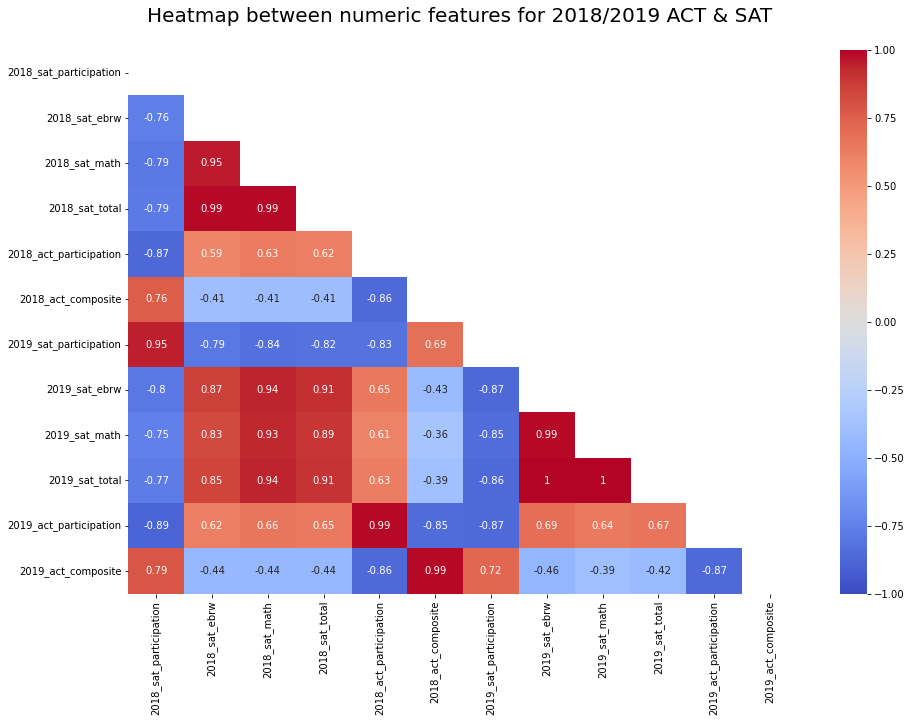

In [106]:
# Create a mask to prevent duplicates
# Use heatmap for easier visualization of correlation
mask_matrix = np.triu(final_1819_csv.corr())

plt.subplots(figsize=(15,10))
plt.title('Heatmap between numeric features for 2018/2019 ACT & SAT \n', fontsize=20)
sns.heatmap(final_1819_csv.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', mask=mask_matrix);

There are several patterns of interest here --

Firstly, we observe that ACT participation has a strong negative correlation with ACT composite scores. This means that states with lower ACT participation tend to have higher ACT scores, and vice versa for states with high ACT participation rates. The same for SAT participation rates, where there is an equally strong negative correlation between participation rates and SAT scores.

Secondly, total and test scores by subjects from 2018 are strongly correlated with the total and same subject test scores in 2019. This means that states are likely to continue doing well from year to year. This is unsurprising as states are unlikely to dramatically go up or down in test scores over a single year, due to policies and institutions (e.g. state education departments) that work to maintain consistent educational results year-on-year. Barring dramatic policy changes like switching from one test to another, states are likely to produce to the same results over the years.

The total test scores / participation rates for SAT is negatively correlated with that for ACT of the same year, and vice versa. It's pretty unusual for a student to take both tests in a year considering the time, effort and money factors. From another perspective, one of the possibility is self-selection bias and the effect may be larger than expected. Knowing that some states mandate students to take up one of the testsand students may want to sit for another in order to entera particular college. In addition, some students who want to take up both tests or take up the same test at different periods within the same year to increase their chances of obtaining a good score and make their studying more worth-while. 

#### Plot and interpret histogram

In [107]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, main_title,sharex=False, kde=False, figsize=(14,7)):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,nrows*5), sharex=sharex, sharey=True)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        # Calculate mean
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='dashed', color='crimson')
        
        # Calculate median 
        median = np.median(dataframe[list_of_columns[i]])
        ax[i].axvline(median, linestyle='dotted', color='midnightblue')
        
        min_ylim, max_ylim = ax[i].get_ylim()
        ax[i].text(x=dataframe[column].mean(), y=max_ylim*0.88, s='Mean', rotation=90, color='crimson')
        ax[i].text(x=dataframe[column].median(), y=max_ylim*0.85, s='Median', rotation=90, color='midnightblue')
        
        # Set color of graph according to test type
        if '_act_' in column:
            color = '#E1812C'
        elif '_sat_' in column:
            color = '#3274A1'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], kde=kde, bins=8)
        ax[i].set_title(list_of_titles[i] + f' (Mean: {mean:.2f}) (Median:{median:.2f})')
        ax[i].set_xlabel(list_of_xlabels[i])
        # To prevent label duplication
        if i % 2 == 0:
            ax[i].set_ylabel('Number of States')
    
    fig.suptitle(main_title, fontsize=20)
    plt.show();

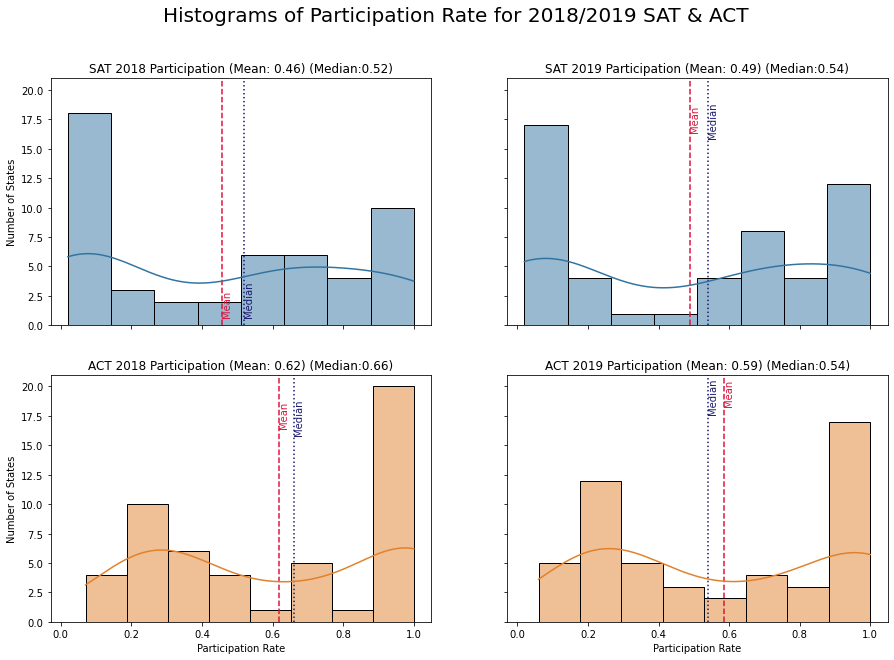

In [108]:
subplot_histograms(final_1819_csv, ['2018_sat_participation', '2019_sat_participation', '2018_act_participation', '2019_act_participation'], 
                   ['SAT 2018 Participation', 'SAT 2019 Participation', 'ACT 2018 Participation', 'ACT 2019 Participation'], 
                   ['Participation Rate', 'Participation Rate', 
                    'Participation Rate', 'Participation Rate'],'Histograms of Participation Rate for 2018/2019 SAT & ACT', sharex=True, kde=True)

Overall, we can see that the ACT has a larger baseline following than the SAT. The SAT has a large number of states with an extremely low participation rate, while the ACT has a large number of states with a extremely high participation rate.

In 2019, SAT participation increased by 3%, while ACT participation decreased by 3% on average. This suggests that some states are starting to adopt the SAT test over the ACT test, with some states moving away from standardized testing altogether. The number of states with a 90% - 100% participation for the SAT increased in 2019, while ACT participation rates for states in the same range decreased. One obvious change from the rest is that ACT mean participation rate per state shifted to the right of median.

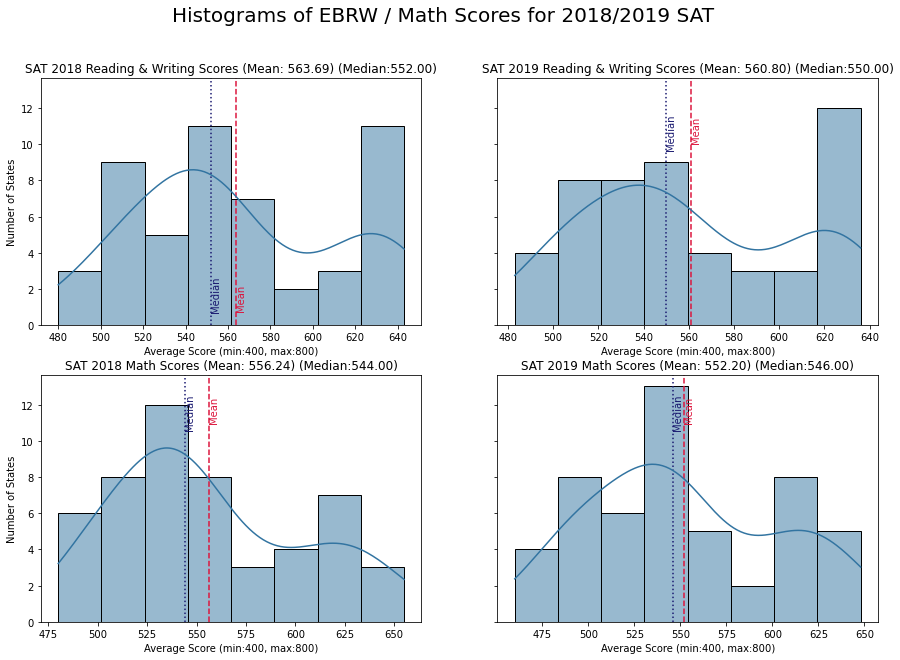

In [109]:
subplot_histograms(final_1819_csv, ['2018_sat_ebrw', '2019_sat_ebrw', '2018_sat_math', '2019_sat_math'], 
                   ['SAT 2018 Reading & Writing Scores', 'SAT 2019 Reading & Writing Scores', 'SAT 2018 Math Scores', 'SAT 2019 Math Scores'], 
                   ['Average Score (min:400, max:800)', 'Average Score (min:400, max:800)', 
                    'Average Score (min:400, max:800)', 'Average Score (min:400, max:800)'],'Histograms of EBRW / Math Scores for 2018/2019 SAT ', kde=True)

SAT average scores for Reading & Writing dropped by 2.89 points in 2019,  while Math scores dropped by 4.04. ACT Reading & Writing scores from 2018 and 2019 seem to be more bimodal in comparison to Math subject.

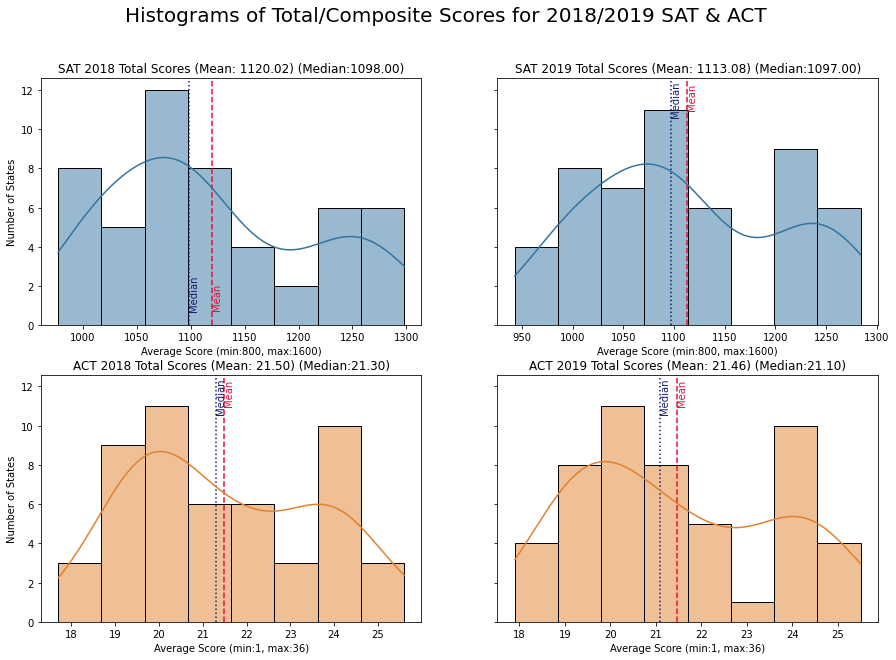

In [110]:
subplot_histograms(final_1819_csv, ['2018_sat_total', '2019_sat_total', '2018_act_composite', '2019_act_composite'], 
                   ['SAT 2018 Total Scores', 'SAT 2019 Total Scores', 'ACT 2018 Total Scores', 'ACT 2019 Total Scores'], 
                   ['Average Score (min:800, max:1600)', 'Average Score (min:800, max:1600)', 
                    'Average Score (min:1, max:36)', 'Average Score (min:1, max:36)'], 'Histograms of Total/Composite Scores for 2018/2019 SAT & ACT', kde=True)

In [111]:
print("For SAT 2018, there are {} states below average total score.".format(final_1819_csv[final_1819_csv['2018_sat_total']<final_1819_csv['2018_sat_total'].mean()].count()[0]))
print("For SAT 2019, there are {} states below average total score.".format(final_1819_csv[final_1819_csv['2018_sat_total']<final_1819_csv['2018_sat_total'].mean()].count()[0]))
print("For ACT 2018, there are {} states below average composite score.".format(final_1819_csv[final_1819_csv['2018_act_composite']<final_1819_csv['2018_act_composite'].mean()].count()[0]))
print("For ACT 2019, there are {} states below average composite score.".format(final_1819_csv[final_1819_csv['2019_act_composite']<final_1819_csv['2019_act_composite'].mean()].count()[0]))

For SAT 2018, there are 32 states below average total score.
For SAT 2019, there are 32 states below average total score.
For ACT 2018, there are 28 states below average composite score.
For ACT 2019, there are 29 states below average composite score.


The average total score for the SAT dropped by 6.92 points in 2019. On the other hand, ACT English and Reading scores increased by 0.9 and 1.0 respectively.

Both test do not appear to be normally distributed. While SAT total scores appear to be more bimodally distributed, it can be divided into two distinct groups of states i.e. high-performing and low-performing states. This pattern is also obvious within the ACT data, but to a lesser degree.

For both SAT and ACT Total/Composite in the two years, we can see that the distributions are all right-skewed by observing the mean in relation to the median. The distributions for SAT Total for both years are not symmetrical about the mean since there are more states (32 states) residing on the left of the mean. Similarly, the distributions for ACT Composite for both years are not symmetrical about the mean since there are more states (28-29 states) residing on the left of the mean.


#### Plot and interpret boxplots

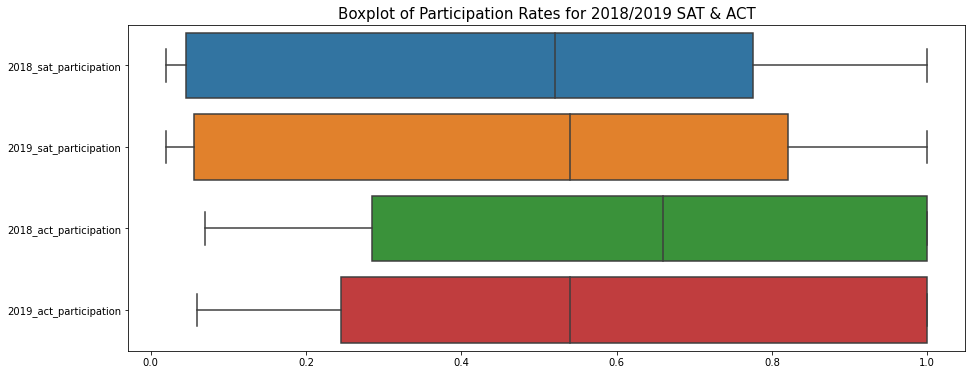

In [112]:
fig, ax = plt.subplots(figsize=(15, 6))

# Boxplot of participation rates for 2018/2019 SAT & ACT
sns.boxplot(data=final_1819_csv[['2018_sat_participation', '2019_sat_participation', '2018_act_participation', '2019_act_participation']],
           orient='h')
ax.set_title('Boxplot of Participation Rates for 2018/2019 SAT & ACT', fontsize=15)
plt.show();

In [113]:
# sns.set_theme(style="whitegrid")

# ax = sns.violinplot( data= final_1819_csv[['2018_sat_participation', '2019_sat_participation', '2018_act_participation', '2019_act_participation']],
#                     orient ='h', palette="muted")

For both years 2018 and 2019, the ACT participation rate are distributed within a significantly higher range than that of the SAT participation rate. The right skewness of ACT boxplot diagram suggests stronger support for ACT test thoughout US.

For both years, the variance/ interquartile range of the ACT participation rates span over a higher range of participation (0.2x-1.0) as compared to that of the SAT participation rates (0.0x-0.7). This suggests that the ACT has been performing better than the SAT in terms of participation rates of the U.S. states.

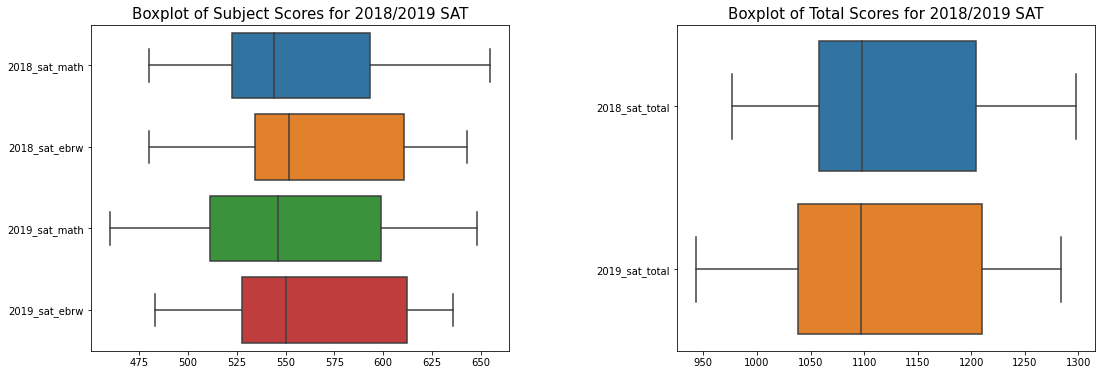

In [114]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))   
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

# Boxplot of Subject scores for 2018/2019 SAT
sns.boxplot(data=final_1819_csv[['2018_sat_math', '2018_sat_ebrw', '2019_sat_math', '2019_sat_ebrw']],
           ax=ax[0], orient='h')
ax[0].set_title('Boxplot of Subject Scores for 2018/2019 SAT', fontsize=15)

# Boxplot of Total scores for 2017/2018 SAT
sns.boxplot(data=final_1819_csv[['2018_sat_total', '2019_sat_total']],
           ax=ax[1], orient='h')
ax[1].set_title('Boxplot of Total Scores for 2018/2019 SAT', fontsize=15)

plt.show();

For year 2019, the interquartile range of the both SAT Math and EBRW Scores spans over a wider range than that for year 2018. This may suggest that students have the tendency to perform slightly better in 2019 for the SAT.
The 50th percentile for the SAT Total Scores is higher in 2018 as compared to 2019.

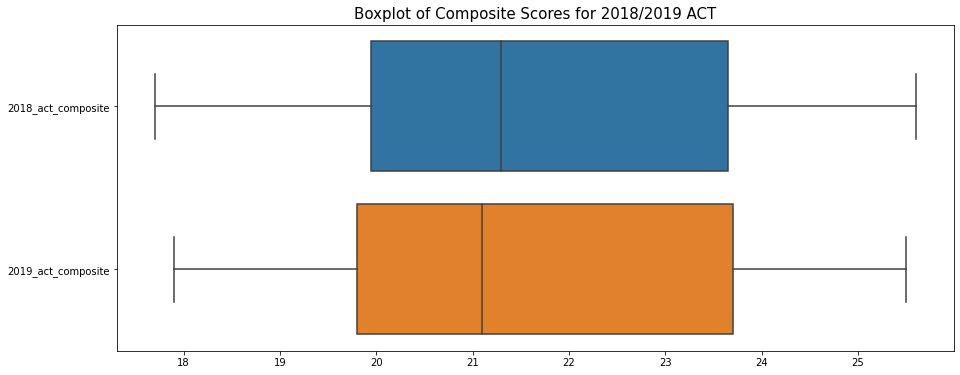

In [115]:
fig, ax = plt.subplots(figsize=(15, 6))   

# Boxplot of Composite scores for 2018/2019 ACT
sns.boxplot(data=final_1819_csv[['2018_act_composite', '2019_act_composite']], orient='h')
ax.set_title('Boxplot of Composite Scores for 2018/2019 ACT', fontsize=15)

plt.show();

The 50th percentile for the ACT Composite Scores is slightly lower for year 2019 than year 2018.
The interquartile range of the ACT Composite Scores is almost the same for both years 2018 and 2019. This suggests that students taking the ACT perform consistently year-to-year.

#### Plot and interpret scatterplots

In [116]:
# Function to plot multiple scatter plots
def multi_plot_scatter(df, list_of_x, list_of_y, list_of_titles, xlabels, ylabels, sharex = False, sharey = False):
    if len(list_of_x) == 1:
        ncols = 1
    else:
        ncols = 2
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,7), sharex = sharex, sharey = sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_x):
        sns_fig = sns.regplot(data=df, x=list_of_x[i], y=list_of_y[i], ax=ax[i]).set_title(list_of_titles[i])
        ax[i].set_xlabel(xlabels[i])
        ax[i].set_ylabel(ylabels[i])
        plt.tight_layout()
        
# Function for plotting single scatter plots
def plot_scatter(df, x, y, title):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    sns.regplot(data=df, x=x, y=y)
    plt.tight_layout()

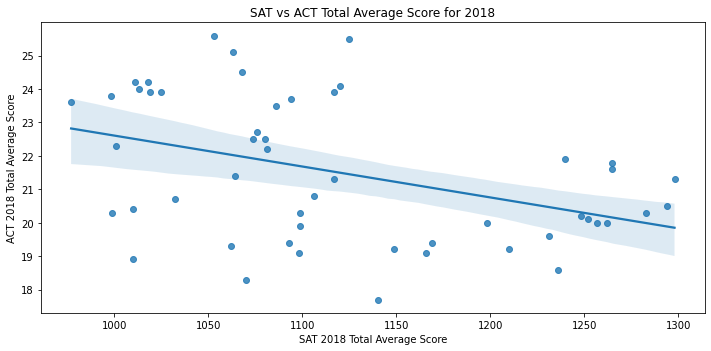

In [117]:
plot_scatter(final_1819_csv, '2018_sat_total', '2018_act_composite', 'SAT vs ACT Total Average Score for 2018')
plt.xlabel('SAT 2018 Total Average Score')
plt.ylabel('ACT 2018 Total Average Score');

Generally, ACT and SAT scores are negatively correlated to each other. This suggests that states tend to focus on one test over the other, meaning that states are likely to have either high SAT/ low ACT or low SAT/ high ACT average scores. In other words, states with low SAT scores tend to have high ACT scores and vice versa.

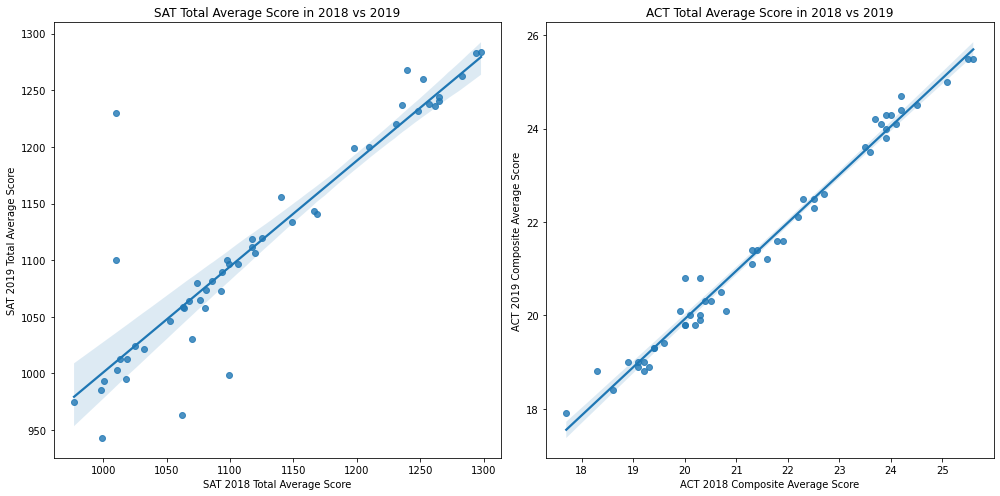

In [118]:
multi_plot_scatter(final_1819_csv, ['2018_sat_total', '2018_act_composite'], ['2019_sat_total', '2019_act_composite'], 
                   ['SAT Total Average Score in 2018 vs 2019', 'ACT Total Average Score in 2018 vs 2019'], 
                   ['SAT 2018 Total Average Score', 'ACT 2018 Composite Average Score'],
                   ['SAT 2019 Total Average Score', 'ACT 2019 Composite Average Score'])

In [119]:
# Check for states where great improvement for SAT test in 2019
final_1819_csv[(final_1819_csv['2018_sat_total'] < 1050) & (final_1819_csv['2019_sat_total'] > 1050.0)] \
        [['state','2018_sat_participation', '2018_sat_total','2019_sat_participation', '2019_sat_total']] \
        .sort_values('2019_sat_total')

,state,2018_sat_participation,2018_sat_total,2019_sat_participation,2019_sat_total
11,Hawaii,0.56,1010,0.54,1100
44,Utah,0.04,1010,0.04,1230


In [120]:
# Check for states where drastic increment on participation for SAT test in 2019
final_1819_csv[(final_1819_csv['2018_sat_participation'] < 0.60) & (final_1819_csv['2019_sat_participation'] >= 0.90)] \
        [['state','2018_sat_participation', '2018_sat_total','2018_act_participation', '2018_act_composite', '2019_sat_participation', '2019_sat_total','2019_act_participation', '2019_act_composite']] \
        .sort_values('2018_sat_participation')

,state,2018_sat_participation,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_total,2019_act_participation,2019_act_composite
48,West Virginia,0.28,999,0.65,20.3,0.99,943,0.49,20.8
9,Florida,0.56,1099,0.66,19.9,1.00,999,0.54,20.1


In [121]:
# Check for states where drastic increment on participation for ACT test in 2019
final_1819_csv[(final_1819_csv['2018_act_participation'] < 0.50) & (final_1819_csv['2019_act_participation'] >= 0.90)] \
        [['state','2018_sat_participation', '2018_sat_total','2018_act_participation', '2018_act_composite', '2019_sat_participation', '2019_sat_total','2019_act_participation', '2019_act_composite']] \
        .sort_values('2018_act_participation')

,state,2018_sat_participation,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_total,2019_act_participation,2019_act_composite


In [122]:
# Check if any states with 100% participation on ACT test have a rate change from 2018 to 2019
final_1819_csv[(final_1819_csv['2018_act_participation'] == 1.00) & (final_1819_csv['2019_act_participation'] < 1.00) ]

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
25,Missouri,0.04,633,629,1262,1.0,20.0,0.04,622,615,1236,0.82,20.8
40,South Carolina,0.55,547,523,1070,1.0,18.3,0.68,526,504,1030,0.78,18.8


ACT and SAT test results year by year have a very strong correlation. This means that states that did well in the last year are likely to do well in the next year. This correlation is much stronger for the ACT test, meaning that ACT scores tend to remain static from one year to the next. This could actually be an incentive for high-scoring states to stay with the ACT, given that scores seem to less scattered from one year to the next as compared to the SAT. However, there are 2 states performed better than previous year - Hawaii and Utah with increment of 90-120 scores.  

Drastic increment in partcipation rate for 2 states - West Virginia and Florida which had the highest increase in SAT participation from 2018 to 2019. We later found that it is likely due to the decision made by Department of Education in making the SAT a mandatory between 2018-2019. This change in SAT and ACT participation rates for these two states year-to-year may have significant change in their mean total/composite score. With more students participated in SAT 2019 than SAT 2018, the mean total score for SAT 2019 was brought down significantly. On the other side, less number of students participating in the ACT 2019, the composite score was higher. Students performed better under the effects of self-selection bias to take the test at their own expense.

### Choropleth Mapping

In [123]:
import plotly as py
import plotly.graph_objs as gb
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image # To load images
init_notebook_mode(connected=True) # To run plotly offline

In [124]:
us_state_abbrev = { 'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }
# Source: https://gist.github.com/rogerallen/1583593

In [125]:
# Add abbreviations for each USA state in dataframe
us_abbrev_states = [us_state_abbrev[state] for state in final_1819_csv.state if state in us_state_abbrev]
final_1819_csv['us_abbrev_states'] = us_abbrev_states

In [126]:
final_1819_csv.head(2)

,state,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite,2019_sat_participation,2019_sat_ebrw,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite,us_abbrev_states
0,Alabama,0.06,595,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9,AL
1,Alaska,0.43,562,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1,AK


In [127]:
final_1819_csv.dtypes

state                      object
2018_sat_participation    float64
2018_sat_ebrw               int64
2018_sat_math               int64
2018_sat_total              int64
2018_act_participation    float64
2018_act_composite        float64
2019_sat_participation    float64
2019_sat_ebrw               int64
2019_sat_math               int64
2019_sat_total              int64
2019_act_participation    float64
2019_act_composite        float64
us_abbrev_states           object
dtype: object

In [128]:
# # # Function to plot choropleth maps of the US
# # source: http://gobbledygoon.com/projects/GA-DSI-project-01/code/Project1.html
# # source: https://www.benjamindornel.com/sat-act.html#Exploratory-Data-Analysis
# def plot_choropleth(df, series, plot_title, test_type, year):
#     test_type = test_type.lower()
    
#     # Determine range for map and colorbar
#     if test_type == '_sat_':
#         zmin = series.min() - series.min() % 50 # rounds down to closest 50 e.g. 105 -> 100
#         zmax = series.max() - series.max() % -50 # rounds up to closest 50 e.g. 130 -> 150
    
#     elif test_type == '_act_':
#         zmin = series.min()
#         zmax = series.max()
    
#     else:
#         zmin = series.min()
#         zmax = series.nlargest(12).sum()/12 # Gets the average from the 12 largest numbers (as DC's GDP is an extreme outlier)
        
#     # Create hover text values including the full name of the state and breakdown of individual subject scores 
#     new_list = []
#     for i, state in enumerate(final_1819_csv.index):
#         temp_string = ''
#         new_dict = dict(final_1819_csv.loc[state].items())
#         temp_string += state + '<br>'
#         for key, value in new_dict.items():
#             if f'{year}_{test_type}' in key and 'participation' not in key:
#                 temp_string += key[9:].capitalize().replace('_',' ') + ':' + ' ' + str(value) + '<br>'
#         new_list.append(temp_string)
    
#     # Set color of choropleth map
#     if 'sat' in test_type.lower():
#         color = 'Blues'
#     elif 'act' in test_type.lower():
#         color = 'Oranges'
#     else:
#         color = 'Greens'
    
#     # Create dictionary to be used by plotly
#     data = dict(type='choropleth',
#                 locations=us_abbrev_states,
#                 locationmode='USA-states',
#                 colorscale=color,
#                 text=new_list,
#                 z=series,
#                 zmin=zmin,
#                 zmax=zmax,
#                 colorbar={'title': ''})
    
#     # Create layout for plotly
#     layout = dict(title=plot_title,
#                   geo={'scope':'usa'})
    
#     # Plot choropleth map using plotly
#     choromap = go.Figure(data=[data], layout=layout)
#     iplot(choromap)

In [129]:
### plot the map ###
# plot_choropleth(final_1819_csv, final_1819_csv['2018_sat_total'], 'SAT 2018 Total Average Scores', 'SAT', '2018')
# plot_choropleth(final_1819_csv, final_1819_csv['2018_act_composite'], 'ACT 2018 Total Average Scores', 'ACT', '2018')
#plot_choropleth(final, final['sat_2018_total'], 'SAT 2018 Total Average Scores', 'SAT', '2018')
#plot_choropleth(final, final['act_2018_total'], 'ACT 2018 Total Average Scores', 'ACT', '2018')

In [130]:
# Create dataframe to observe which states had the most significant changes in SAT/ACT participation rates year-to-year
sat_act_change = final_1819_csv[['state', '2018_sat_participation', '2019_sat_participation', '2019_sat_total', '2018_act_participation', '2019_act_participation', '2019_act_composite']].copy()
sat_act_change['sat_participation_change'] = sat_act_change['2019_sat_participation'] - sat_act_change['2018_sat_participation']
sat_act_change['act_participation_change'] = sat_act_change['2019_act_participation'] - sat_act_change['2018_act_participation']
sat_act_change = sat_act_change[['state', '2018_sat_participation', '2019_sat_participation', 'sat_participation_change', '2019_sat_total', '2018_act_participation', '2019_act_participation', 'act_participation_change', '2019_act_composite']]
sat_act_change.sort_values(by='sat_participation_change', ascending=False).head(10)

,state,2018_sat_participation,2019_sat_participation,sat_participation_change,2019_sat_total,2018_act_participation,2019_act_participation,act_participation_change,2019_act_composite
48,West Virginia,0.28,0.99,0.71,943,0.65,0.49,-0.16,20.8
9,Florida,0.56,1.00,0.44,999,0.66,0.54,-0.12,20.1
35,Oklahoma,0.08,0.22,0.14,963,1.00,1.00,0.00,18.9
40,South Carolina,0.55,0.68,0.13,1030,1.00,0.78,-0.22,18.8
20,Maryland,0.76,0.82,0.06,1058,0.31,0.28,-0.03,22.3
39,Rhode Island,0.97,1.00,0.03,995,0.15,0.12,-0.03,24.7
4,California,0.60,0.63,0.03,1065,0.27,0.23,-0.04,22.6
14,Indiana,0.63,0.66,0.03,1080,0.32,0.29,-0.03,22.5
37,Oregon,0.48,0.51,0.03,1112,0.42,0.42,0.00,21.1
43,Texas,0.66,0.68,0.02,1022,0.45,0.39,-0.06,20.5


In [131]:
sat_act_change.loc[(sat_act_change['2019_act_participation'] > sat_act_change['2019_sat_participation']) & (sat_act_change['act_participation_change'] > 0.0)]

,state,2018_sat_participation,2019_sat_participation,sat_participation_change,2019_sat_total,2018_act_participation,2019_act_participation,act_participation_change,2019_act_composite
2,Arizona,0.29,0.31,0.02,1134,0.66,0.73,0.07,19.0
16,Kansas,0.04,0.04,0.00,1241,0.71,0.72,0.01,21.2


By exploring the data further, we observed that 2 states which had large increase in SAT participation rates from 2018 to 2019 to be West Virginia and Florida. The range of increment is about 44% to 71%. In other words, it means that these 2 states also experienced significant decrease in ACT participation rates from 2018 to 2019 (West Virginia with 16% decrease and Florida with 12% decrease). News record then reflected that it was likely the decision of Department of Education to make the SAT the statewide standardized test for high school juniors bewteen 2018-2019. ACT test is still available at students own expense. It is probably the students wanted to take the ACT in addition to the SAT to improve their chances of college admission.

### sat_act_college 

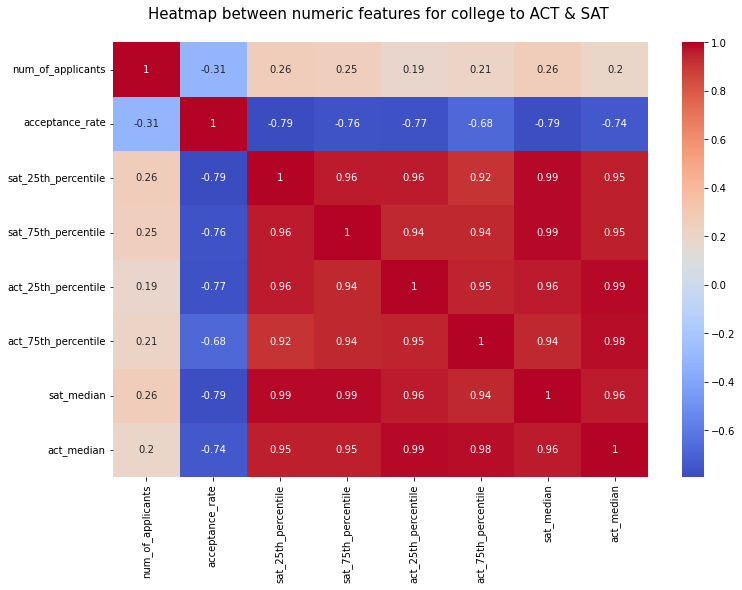

In [132]:
# Plot heatmap to explore correlation
plt.subplots(figsize=(12,8))
plt.title('Heatmap between numeric features for college to ACT & SAT \n', fontsize=15)
sns.heatmap(sat_act_college_new.corr(), annot=True, cmap='coolwarm');

There are several patterns of interest here --

Firstly, we observe that interquartile scores are strongly correlated with one another for both tests ragardless of the deviation. 

Secondly, number of applicants are negatively correlated with the acceptance rate. This means that the chance of being admitted by a college is less if more students applied to the same college. This is unsurprising as bigger pool of students with wider scores range spread the acceptance distribution of that year. 

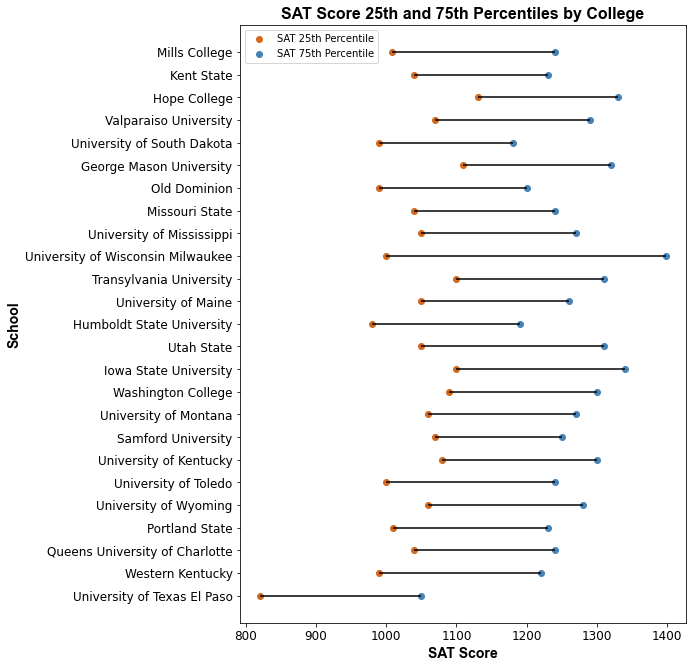

In [133]:
# sat_act_range for top 25 colleges with descending acceptance rate.
plt.figure(figsize=(8,11))

ordered_df = top_25.sort_values(by='acceptance_rate',ascending=False) #https://python-graph-gallery.com/184-lollipop-plot-with-2-groups
my_range=range(0,len(top_25.index))
 

plt.hlines(y=my_range, xmin=ordered_df['sat_25th_percentile'], 
           xmax=ordered_df['sat_75th_percentile'], 
           color='black', alpha=1) #setting up the lollipop chart

plt.scatter(ordered_df['sat_25th_percentile'], my_range, 
            color='chocolate', alpha=1, 
            label='SAT 25th Percentile')

plt.scatter(ordered_df['sat_75th_percentile'], my_range, 
            color='steelblue', alpha=1 , label='SAT 75th Percentile')

plt.legend()
 
fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }  
    
    

plt.yticks(my_range, ordered_df['school'])
plt.title("SAT Score 25th and 75th Percentiles by College", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('SAT Score', fontdict2)
plt.ylabel('School', fontdict2);

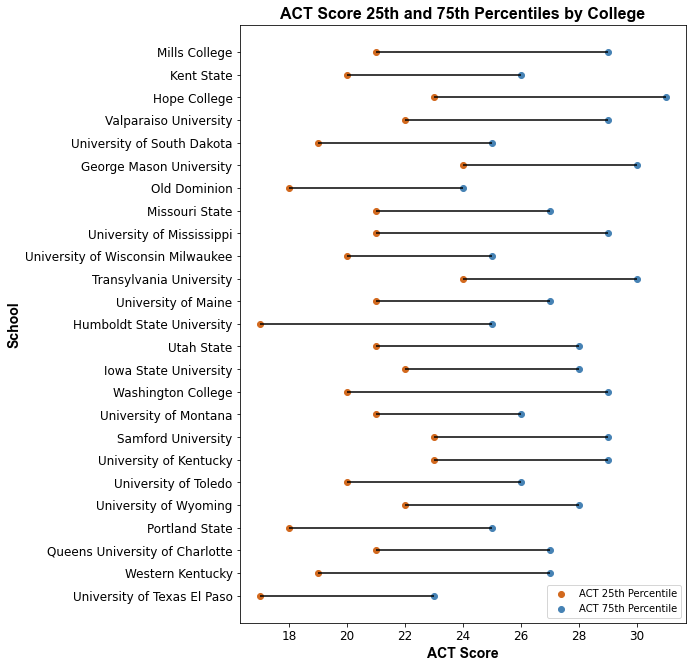

In [134]:
# sat_act_range for top 25 colleges with descending acceptance rate.
plt.figure(figsize=(8,11))

ordered_df = top_25.sort_values(by='acceptance_rate',ascending=False) #https://python-graph-gallery.com/184-lollipop-plot-with-2-groups
my_range=range(0,len(top_25.index))
 

plt.hlines(y=my_range, xmin=ordered_df['act_25th_percentile'], 
           xmax=ordered_df['act_75th_percentile'], 
           color='black', alpha=1) #setting up the lollipop chart

plt.scatter(ordered_df['act_25th_percentile'], my_range, 
            color='chocolate', alpha=1, 
            label='ACT 25th Percentile')

plt.scatter(ordered_df['act_75th_percentile'], my_range, 
            color='steelblue', alpha=1 , label='ACT 75th Percentile')

plt.legend()
 
fontdict = {'family': 'arial', #outlining font characteristics to use in the chart
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }
fontdict2 = {'family': 'arial',
        'color':  'black',
        'weight': 'semibold',
        'size': 14,
        }  
    
    

plt.yticks(my_range, ordered_df['school'])
plt.title("ACT Score 25th and 75th Percentiles by College", loc='center', fontdict=fontdict)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('ACT Score', fontdict2)
plt.ylabel('School', fontdict2);

By plotting the interquartile range of top 25 colleges, we observed that college with highest acceptance rate - University of Texas El Paso has the lowest 25th percentile score required. Sampling with thses 25 colleges, we noticed that majority of them has set criteria of SAT 25th percentile to be 820-1130 and 75th percentile to be 1050-1398 while ACT 25th percentile to be 17-24 and 75th percentile to be 23-31.
Median range of 50th percentile are 1050-1260 for SAT and 21-27 for ACT. 

## Outside Research

#### Standardized test research
With almost 6,000 member schools, universities, colleges, and organizations, the College Board stands out by offering testing materials, scholarships, financial aid and enhanced college search tool, narrowing colleges down by available programs and reputation.[[*source*] (https://www.number2.com/college-board-act/#Understanding_The_Relationship_Between_The_College_Board_and_The_ACT_Test)]. For students considering college, the College Board is a one-stop-shop for everything starting from prep tests such as SAT and CLEP, and students can also go through the financial aid application process. 

Over 2.2 million students in the class of 2019 took the SAT, an increase of 4% over the class of 2018, according to the 2019 SAT Suite of Assessments Program Results. In Virginia, Maryland and the District of Columbia, more students tend to take the College Board’s SAT. The class of 2019 was the first to take the full SAT Suite of Assessments: SAT, PSAT/NMSQT, PSAT 10, and PSAT 8/9. The growth of SAT School Day continues to provide greater access to higher education for an increasingly diverse population. However, mean SAT scores drop slightly. [[*source*] (https://newsroom.collegeboard.org/over-22-million-students-class-2019-took-sat-largest-group-ever)]

The College Board has a new adversity score which responds to a growing trend among colleges to attract and enroll first-generation students and those with few resources. Similarly, ACT has been working on an approach to bolster student diversity through the ACT Holistic Framework. Many college-bound students take both tests.

In 2019, ACT reported that among nearly 1.8 million in the class who took the college admission test at least once,  59% reached a score indicating readiness in English and 39% did so in math. Those results continued a several-year slide. The English readiness rate was the lowest since the readiness measure debuted in 2002, and the math readiness rate equaled a record low set in 2002. The average ACT composite score was 20.7 for this year’s class, down from 20.8 in 2018. Average scores were 22.3 in Maryland, 23.5 in the District and 24 in Virginia. But participation rates in those jurisdictions were relatively low: 32% of 2019 D.C. graduates took the ACT, with even lower shares in the two neighboring states. That makes comparisons with other states and the nation difficult. About 52% of graduates nationally took the ACT.

Among 15 states where officials said nearly all graduates took the test, only four posted an average composite score of 20 or higher: Nebraska, Ohio, Utah and Wisconsin.

Citations:
- https://www.washingtonpost.com/education/2019/10/30/class-act-scores-show-record-low-college-readiness-rates-english-math/
- https://www.erikthered.com/tutor/sat-act-history.html
- https://www.washingtonpost.com/local/education/sat-scores-drop-for-2019-class-but-participation-rises-through-testing-in-schools/2019/09/23/332fc4d0-de11-11e9-8dc8-498eabc129a0_story.html


#### West Virginia:

![alt text](https://en.wikipedia.org/wiki/Flag_of_West_Virginia#/media/File:Flag_of_West_Virginia.svg)

West Virginia has a drastic participation rate improvement for the SAT in 2018-2019. The state policy realised in 2017 where the West Virginia Department of Education (WVDE) chose the SAT as the new statewide standardized test [[*source*](https://wvde.state.wv.us/news/3413/)]. The WVDE felt that the SAT more closely met the specifications of the request for proposals, considering the fact that the West Virginia students have access to a large number of resources for free, including the Khan Academy, to prepare for the SAT. It was also a compulsory for all high school juniors to take either the SAT or ACT, unless the student has disabilities, where he/she will be required to take the West Virginia Alternative Summer Assessment instead.

The difference for students is that the SAT can be taken for free, whereas taking the ACT will be at their own expense. Despite that, we did observe a significant ACT participation rate in year 2019. This may imply that the students of West Virginia prefers taking the ACT over the SAT even though they have to fork out their own money. Further investigation reveals that it is due to the fact that most of the educators in West Virginia were assuming that the ACT contract was going to renewed by the WVDE and it will be kept to status quo (source). The decision to choose the SAT as the new statewide standardized test was a shock to educators and the lack of anticipation would result in a longer adjustment period for school systems. School systems would have to change their school syllabus and learn how to prepare students better for the SAT. During this adjustment period, students will most likely continue to take up the ACT at their own expense.

#### Arizona:

![alt text](https://azlibrary.gov/state-arizona-flag)

From the analysis, Arizona has higher ACT participation than SAT and the change is increasing. The students' act composite score is 19.2. This value falls below the median ACT 50th percentile required by top 25 colleges with highest acceptance rate. Based on the actual test volume and ACT score distributions of 2019 ACT-tested Arizona high school graduates, ACT research estimates that an increase of 0.1 in state average ACT Composite score for the 2019 graduating class  would result in 130 more students enrolling in college. [[*source*](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.act.org/content/dam/act/unsecured/documents/cccr-2019/Arizona-CCCR-2019.pdf)]

In Arizona, 9,068 of the 2019 graduates (18%) taking the ACT two or more times had an average Composite score of 23.1, compared to an average of 18.1 for 41,378 of the 2019 graduates (82%) who took the ACT only once. Arizona ACT State Organization has increased its impact within the state by offering free services such as ACT Educational Opportunity Service (EOS), sending score reports of ACT-tested to colleges and ACT fee waiver to qualified students. 74% of Arizona graduates opted into the ACT Educational Opportunity Service (EOS). EOS is a free service that allows students to gain exposure to recruitment, scholarship agencies, colleges, and universities that students may not have accessed on their own. The ACT Get Your Name in the Game initiative encourages colleges and universities to recruit underserved EOS participants to increase access and opportunity for all. 

## Conclusions and Recommendations

When we look at performance across the standardized test in the 2018-19 school year, it offers a high-level performance summary. It’s impossible to infer whether shifts in performance are due to changes in the underlying ability of students or reflect shifts in the test-taking population. Both College Board and ACT Inc. have been finding ways to improve students' participation with the ultimate mission in mind through the years. Many controversial over these college admissions tests are being biased against low-income and non-white students, the reality is that these tests are the gatekeeper to selective colleges in the US. The evidence indicates that if taking these tests is voluntary, many talented, disadvantaged students will go undetected.


To maximize the benefits of which both tests offered, I recommend one state for each test organization to further work on them. 

The state that SAT should help further is **West Virginia**, given that it has close to 100% participation but low mean total score. This value on year 2019 is much lower than the median of the highest acceptance college.  

While the state that ACT should help further is **Arizona**, given that it's favoring ACT test over SAT. The participation rate is increasing from year 2018 to 2019.

A good score can help students to achieve their academic goals, whether that means getting into a particular college or allocating with better placement or earning financial aid. While higher mean total score of SAT or ACT favors the admission, this is statistically significant to be factored in. With participation rate of a state negatively correlated to mean total score from that state, both tests should not focus too much on increasing the participation rate. 

My recommendation for the above-mentioned target audience is:
- help students apply for college
- work in tandem with state high schools and colleges to make sure students have reliable path
- partner with state boards of education to develop the standardized test
- continue offering it for free to qualified students
- market a reasonable ReTesting package
- continue School Day testing
- update prepping material/ asssessment suite regularly and inform students earlier